In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



EDA of Dataset

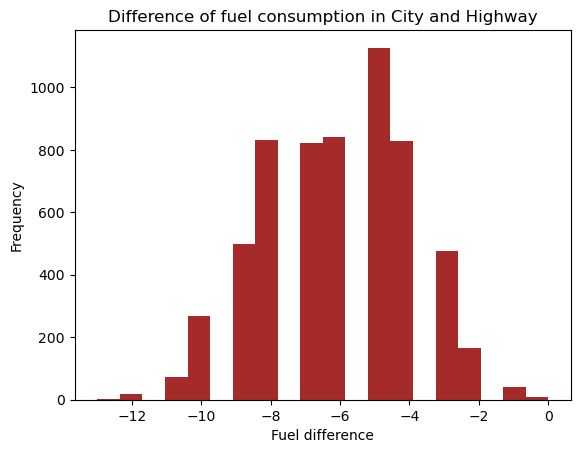

In [4]:
#loaddataset
epa_data = pd.read_csv("epadata.csv")

#remove non-numeric columns
object_cols = epa_data.select_dtypes(include =  "object").columns
epa_data  = epa_data.drop(columns=
                          [col for col in object_cols])

#create new column named "CityHighWayDiff"

epa_data["CityHighwayDiff"] = epa_data["city08"] - epa_data["highway08"]

#plot histogram of CityHighDiff to observe data distribution
plt.hist("CityHighwayDiff", data = epa_data, bins= 20, color ="brown")
plt.title("Difference of fuel consumption in City and Highway")
plt.xlabel("Fuel difference")
plt.ylabel("Frequency")
plt.show()

The histogram shows that most cars achieve 4–8 MPG better fuel economy on highways than in cities, with the difference centered around –6 MPG. 

This confirms that highway driving is generally more fuel-efficient than city driving.


Decade Modeling

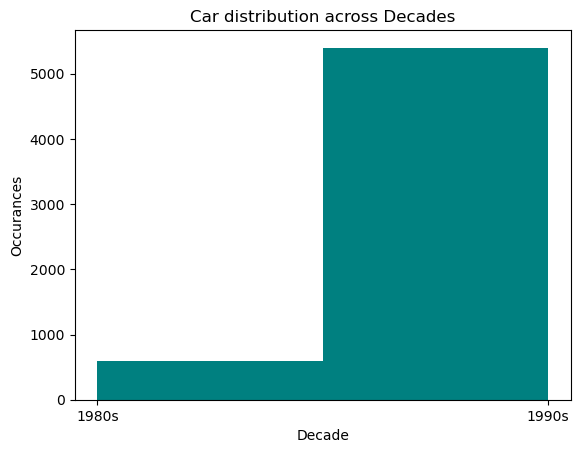

In [7]:
#create a new column Decade from Year
epa_data["Decade"] = epa_data["Decade"] = epa_data["year"].map(lambda  x: str((x // 10) * 10) + "s")

#plot  a histogram of decade to visualize occurances
plt.hist(epa_data["Decade"], bins= 2, color = "teal")
plt.xlabel("Decade")
plt.title("Car distribution across Decades")
plt.ylabel("Occurances")
plt.show()

This histogram shows that most cars in the dataset are from the 1990s, with only a small number from the 1980s. 

This means the data is heavily concentrated in the 1990s decade, indicating fewer samples for earlier years.

In [10]:
# view data structure 
epa_data.isna().sum()

# remove any NAN columns
epa_data.dropna(axis=1, inplace=True)

# remove non-numeric columns ONLY (keep every numeric one, including year)
num_data = epa_data.select_dtypes(include="number").copy()

# recreate CityHighwayDiff if not present
num_data["CityHighwayDiff"] = num_data["city08"] - num_data["highway08"]

# import models
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# segment features and target variables
X = num_data.drop(columns=["year"])  # you may drop year *only* if CityHighwayDiff already derived
y = LabelEncoder().fit_transform(epa_data["Decade"])

logr = LogisticRegression(max_iter=1000, random_state=42)
logr.fit(X, y)

y_pred = logr.predict(X)
train_error = 1 - accuracy_score(y, y_pred)

print("\nTraining error when model is applied to the full dataset:")
print(f"Training Error: {train_error:.4f}")


Training error when model is applied to the full dataset:
Training Error: 0.0000


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split  # <-- add this line

# 50:50 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Train model
logr = LogisticRegression(max_iter=1000, random_state=42)
logr.fit(X_train, y_train)

# Predict on test set
y_pred = logr.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")


Mean Absolute Error: 0.0000


**Explanation of MAE output:**

The classifier achieves zero training error because id, a numeric column is still part of the columns and could be correlatetoth the year column used to derive Decade. Hence, the model can perfectly predict the decade without error.

In [23]:
# eliminate 2 numeric columns: 'id' and 'cityA08'
reduced_data = X.drop(columns=["id", "cityA08"]).copy()

# 50:50 split
X_train, X_test, y_train, y_test = train_test_split(reduced_data, y, test_size=0.5, random_state=42)

# train model
logr = LogisticRegression(max_iter=1000, random_state=123)
logr.fit(X_train, y_train)

# predictions
y_pred_train = logr.predict(X_train)
y_pred_test = logr.predict(X_test)

# compute MAEs
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("After removing id and cityA08 columns:\n")
print(f"Mean Absolute Error on Training Data: {mae_train:.4f}")
print(f"Mean Absolute Error on Test Data: {mae_test:.4f}")

After removing id and cityA08 columns:

Mean Absolute Error on Training Data: 0.1027
Mean Absolute Error on Test Data: 0.0963


**Comparison Between MAE in Full dataset and Reduced Dataset**

In Question 3, the linear classifier was trained using all numeric columns, including id and year.
Because year directly determines the Decade, and id is strongly correlated with it, the model achieved a perfect prediction on the 50 : 50 train–test split, producing a Mean Absolute Error (MAE) of 0.0000, reflecting data leakage.

In Question 4, the columns id and cityA08 were removed before training.
This broke the near-perfect correlation between the features and the target, forcing the classifier to rely on true car-performance features such as city08, highway08, and cylinders.

As a result, the model’s performance became more realistic, with
MAE = 0.1027 on the training set and MAE = 0.0963 on the test set.

These small but non-zero errors indicate proper generalization and confirm that the model is now learning meaningful relationships instead of exploiting identifiers.

Overall, removing id (an identifier) and cityA08 (a non-informative column) improved the model’s validity by eliminating leakage, even though it slightly reduced accuracy, it is a desirable outcome in a real predictive setting.